# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [973]:
# If on colab, uncomment the following lines

# ! wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv

In [974]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [975]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,822,95,41,82,170,65,9,145,46,19,145,163,314,140,64,4,8,199,207
1,486,104,57,103,222,72,12,221,30,25,177,223,718,218,72,11,12,186,195
2,182,91,42,66,169,66,7,145,44,19,140,169,325,159,67,4,0,201,207
3,375,109,52,95,189,58,4,227,29,25,158,262,776,217,82,0,19,187,186
4,528,95,47,73,195,70,7,167,38,20,152,184,430,185,69,9,19,200,206
5,223,81,44,72,139,60,6,153,44,19,146,180,347,178,81,1,15,182,186
6,840,93,34,66,140,56,7,130,51,18,120,151,251,114,62,5,29,201,207
7,593,89,43,77,147,54,8,144,46,19,146,163,308,174,64,13,5,194,201
8,346,117,52,110,228,65,12,212,31,24,163,228,668,220,66,21,25,194,205
9,357,109,49,109,193,59,10,207,32,24,156,225,635,213,70,13,31,191,202


Methods `describe` and `info` deliver some useful information.

In [976]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,425.723133,93.520947,44.675774,81.801457,168.204007,61.644809,8.457195,167.327869,41.273224,20.468124,147.438980,186.734062,431.540984,173.763206,72.158470,6.522769,12.646630,188.998179,195.854281
std,242.288797,8.063277,6.154680,15.928751,33.047995,7.110666,3.945857,32.506680,7.777590,2.526030,14.631309,30.436279,171.479332,31.793047,7.335198,4.980796,8.833356,6.298389,7.449629
min,0.000000,76.000000,33.000000,42.000000,104.000000,47.000000,2.000000,114.000000,26.000000,17.000000,118.000000,131.000000,191.000000,112.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,217.000000,87.000000,40.000000,70.000000,140.000000,57.000000,7.000000,146.000000,34.000000,19.000000,136.000000,167.000000,317.000000,148.000000,67.000000,2.000000,6.000000,184.000000,191.000000
50%,430.000000,93.000000,44.000000,79.000000,165.000000,61.000000,8.000000,157.000000,43.000000,20.000000,145.000000,177.000000,363.000000,173.000000,71.000000,6.000000,11.000000,189.000000,197.000000
75%,636.000000,99.000000,49.000000,98.000000,195.000000,66.000000,10.000000,196.000000,46.000000,23.000000,159.000000,216.000000,576.000000,196.000000,75.000000,10.000000,19.000000,193.000000,201.000000
max,845.000000,117.000000,59.000000,110.000000,306.000000,126.000000,52.000000,265.000000,59.000000,29.000000,186.000000,288.000000,1018.000000,268.000000,127.000000,22.000000,40.000000,206.000000,211.000000


In [977]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int32
 1   1       549 non-null    int32
 2   2       549 non-null    int32
 3   3       549 non-null    int32
 4   4       549 non-null    int32
 5   5       549 non-null    int32
 6   6       549 non-null    int32
 7   7       549 non-null    int32
 8   8       549 non-null    int32
 9   9       549 non-null    int32
 10  10      549 non-null    int32
 11  11      549 non-null    int32
 12  12      549 non-null    int32
 13  13      549 non-null    int32
 14  14      549 non-null    int32
 15  15      549 non-null    int32
 16  16      549 non-null    int32
 17  17      549 non-null    int32
 18  18      549 non-null    int32
dtypes: int32(19)
memory usage: 40.8 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [978]:
### YOUR CODE HERE
# output aour data as a dataframe
raw_dataset = pd.read_csv('car_data.csv')
raw_dataset

,0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van
0,1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,van
1,2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,saab
2,3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,van
3,4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,bus
4,5,107,57,106,172,50,6,255,26,28,169,280,957,264,85,5,9,181,183,bus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
840,841,93,39,87,183,64,8,169,40,20,134,200,422,149,72,7,25,188,195,saab
841,842,89,46,84,163,66,11,159,43,20,159,173,368,176,72,1,20,186,197,van
842,843,106,54,101,222,67,12,222,30,25,173,228,721,200,70,3,4,187,201,saab
843,844,86,36,78,146,58,7,135,50,18,124,155,270,148,66,0,25,190,195,saab


In [979]:
# As we can see, target colomn is a categorial, so, we need to represent it as number
# Also, we should to scale dataset and remove the first colomn, cause it's just an index of element, 
# it doesn't include any information about objects


# Importing LabelEncoder from Sklearn 
# library from preprocessing Module.
from sklearn.preprocessing import LabelEncoder
 
# Creating a instance of label Encoder.
le = LabelEncoder()
 
# Using .fit_transform function to fit label
# encoder and return encoded label
label = le.fit_transform(raw_dataset['van'])
 
# printing label
label

array([3, 2, 3, 0, 0, 0, 3, 3, 2, 3, 2, 0, 3, 0, 1, 3, 0, 2, 1, 0, 3, 0,
       0, 2, 3, 2, 2, 0, 2, 3, 2, 1, 1, 1, 3, 0, 3, 2, 0, 1, 3, 3, 2, 2,
       3, 3, 0, 3, 2, 2, 2, 1, 0, 0, 3, 2, 3, 1, 3, 1, 1, 3, 0, 0, 1, 0,
       1, 3, 0, 1, 1, 1, 1, 3, 1, 2, 2, 0, 0, 0, 0, 3, 1, 0, 0, 3, 3, 0,
       1, 2, 1, 2, 3, 0, 1, 2, 0, 1, 0, 0, 3, 3, 3, 0, 2, 1, 1, 0, 0, 3,
       3, 1, 1, 3, 3, 1, 2, 0, 0, 2, 3, 3, 2, 3, 3, 0, 0, 3, 0, 2, 2, 2,
       3, 1, 3, 3, 3, 2, 3, 2, 0, 1, 0, 1, 1, 3, 0, 2, 3, 2, 0, 1, 2, 3,
       0, 1, 3, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 0, 3, 1, 0, 3, 0, 3, 0, 1,
       0, 0, 3, 2, 1, 0, 2, 2, 0, 0, 1, 1, 1, 1, 3, 2, 0, 2, 0, 2, 0, 0,
       0, 3, 2, 1, 1, 3, 3, 1, 0, 0, 1, 1, 3, 0, 0, 1, 1, 2, 1, 0, 3, 1,
       3, 0, 0, 2, 3, 2, 3, 2, 2, 3, 2, 0, 2, 3, 3, 0, 0, 1, 0, 1, 1, 0,
       2, 3, 3, 0, 2, 1, 2, 3, 1, 3, 0, 3, 2, 2, 1, 2, 1, 2, 2, 3, 3, 2,
       0, 0, 2, 3, 3, 0, 2, 3, 3, 0, 0, 0, 1, 2, 0, 1, 0, 0, 2, 3, 2, 0,
       3, 1, 2, 3, 3, 0, 3, 0, 0, 0, 2, 2, 0, 2, 1,

In [980]:
# removing the column 'Purchased' from df
# as it is of no use now.
raw_dataset.drop("van", axis=1, inplace=True)
 
# drop the first colomn (represent index)
raw_dataset.drop("0", axis=1, inplace=True)

# Appending the array to our dataFrame 
# with column name 'Purchased'
raw_dataset["van"] = label
 
# printing Dataframe
raw_dataset

,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van
0,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,3
1,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,2
2,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,3
3,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,0
4,107,57,106,172,50,6,255,26,28,169,280,957,264,85,5,9,181,183,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
840,93,39,87,183,64,8,169,40,20,134,200,422,149,72,7,25,188,195,2
841,89,46,84,163,66,11,159,43,20,159,173,368,176,72,1,20,186,197,3
842,106,54,101,222,67,12,222,30,25,173,228,721,200,70,3,4,187,201,2
843,86,36,78,146,58,7,135,50,18,124,155,270,148,66,0,25,190,195,2


In [981]:
# проверим, что все фичи имеют один и тот же тип
len(set(raw_dataset.dtypes[:-1])) == 1

True

In [982]:
# # проверим корреляцию данных
def count_correlationn(df):
    correlation_matrix = df.corr().abs()
    threshold = 0.9
    correlated_features = np.where(correlation_matrix > threshold)
    arr = []

    for feature_a, feature_b in zip(*correlated_features):
        if feature_a != feature_b and feature_a < feature_b:
            arr.append([df.columns[feature_a], df.columns[feature_b]])
    return arr

In [983]:
arr = count_correlationn(raw_dataset)
for i in range(len(arr)):
    print(arr[i])

['48', '159']
['48', '184']
['83', '162']
['83', '42']
['162', '42']
['162', '20']
['162', '176']
['162', '379']
['42', '20']
['42', '176']
['42', '379']
['20', '176']
['20', '379']
['176', '379']


In [984]:
# вывели матрицу корреляции
raw_dataset.corr()

,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van
95,1.000000,0.692889,0.792447,0.691648,0.093069,0.148201,0.813075,-0.788694,0.813517,0.676240,0.764577,0.818767,0.585330,-0.252942,0.233712,0.156723,0.297862,0.365530,-0.000697
48,0.692889,1.000000,0.798581,0.622738,0.149078,0.247331,0.860645,-0.828973,0.858218,0.965796,0.808940,0.853078,0.936097,0.058880,0.148502,-0.015715,-0.112882,0.038573,-0.175299
83,0.792447,0.798581,1.000000,0.771660,0.161604,0.264303,0.907319,-0.912328,0.895370,0.774737,0.864544,0.889749,0.705834,-0.231653,0.116484,0.264519,0.148010,0.335447,-0.059966
178,0.691648,0.622738,0.771660,1.000000,0.665690,0.447994,0.738577,-0.792644,0.711621,0.570130,0.797828,0.725975,0.539027,-0.182326,0.050561,0.174200,0.380896,0.469249,-0.174594
72,0.093069,0.149078,0.161604,0.665690,1.000000,0.648308,0.106493,-0.185487,0.080413,0.128168,0.275632,0.092816,0.124097,0.152977,-0.056746,-0.034807,0.238936,0.267372,-0.092791
10,0.148201,0.247331,0.264303,0.447994,0.648308,1.000000,0.166859,-0.180107,0.161958,0.305785,0.319627,0.144752,0.189705,0.294705,0.015247,0.043245,-0.027204,0.143862,0.194894
162,0.813075,0.860645,0.907319,0.738577,0.106493,0.166859,1.000000,-0.973387,0.992088,0.811129,0.951879,0.996329,0.801060,-0.028701,0.074331,0.210823,0.003977,0.120000,-0.280890
42,-0.788694,-0.828973,-0.912328,-0.792644,-0.185487,-0.180107,-0.973387,1.000000,-0.950515,-0.775926,-0.938427,-0.956544,-0.766238,0.104936,-0.053335,-0.185268,-0.112003,-0.216762,0.327051
20,0.813517,0.858218,0.895370,0.711621,0.080413,0.161958,0.992088,-0.950515,1.000000,0.813808,0.938277,0.992354,0.798421,-0.016422,0.082328,0.213214,-0.022141,0.098573,-0.249708
159,0.676240,0.965796,0.774737,0.570130,0.128168,0.305785,0.811129,-0.775926,0.813808,1.000000,0.747839,0.798709,0.866559,0.040651,0.137589,0.000841,-0.107479,0.076632,-0.051944


In [985]:
# # попробуем визуализировать матрицу корреляции
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

<AxesSubplot:>

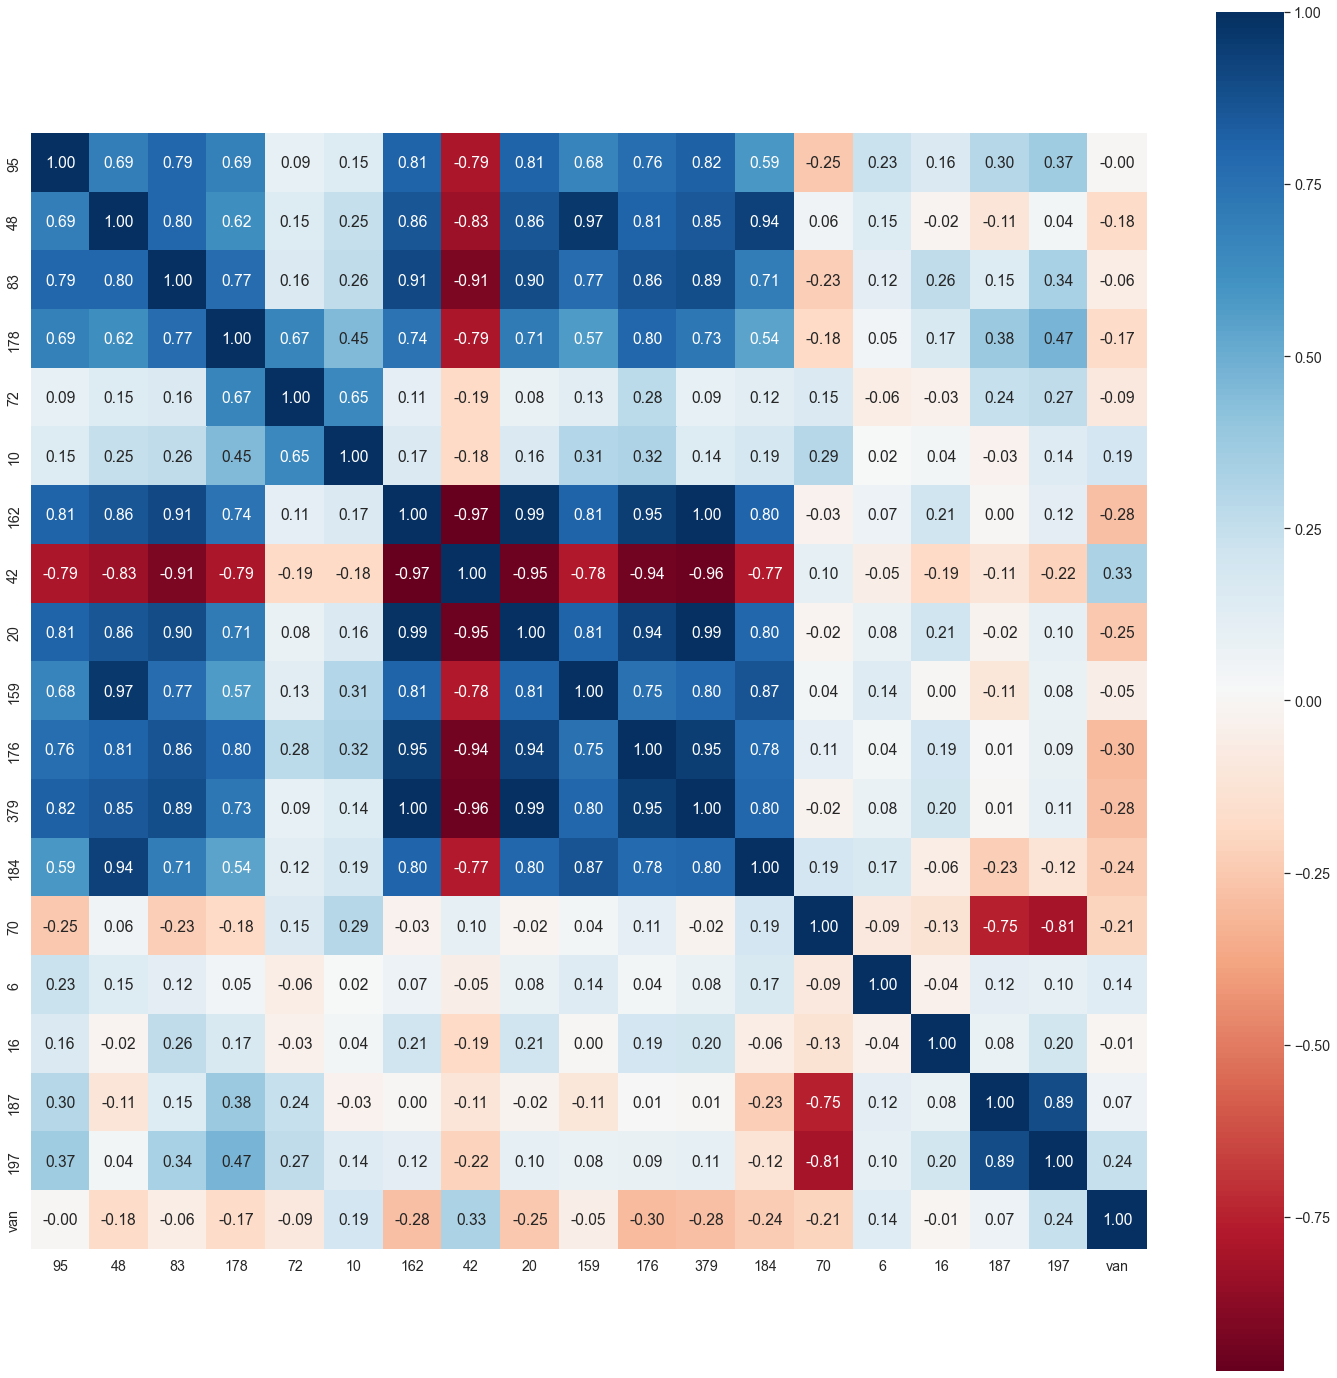

In [986]:
sns.set(font_scale=1.3)
plt.subplots(figsize=(25, 25))
sns.heatmap(raw_dataset.corr(),
            square=True,
            annot=True,
            fmt=".2f",
            cmap="RdBu")

In [987]:
# # # Мы видим, что фича 42 сильно скорелирована со многими фичами. Удали ее
# raw_dataset.drop("42", axis=1, inplace=True)
# raw_dataset.drop("162", axis=1, inplace=True)
# raw_dataset.drop("379", axis=1, inplace=True)
# # raw_dataset.drop("70", axis=1, inplace=True)
# raw_dataset

<AxesSubplot:>

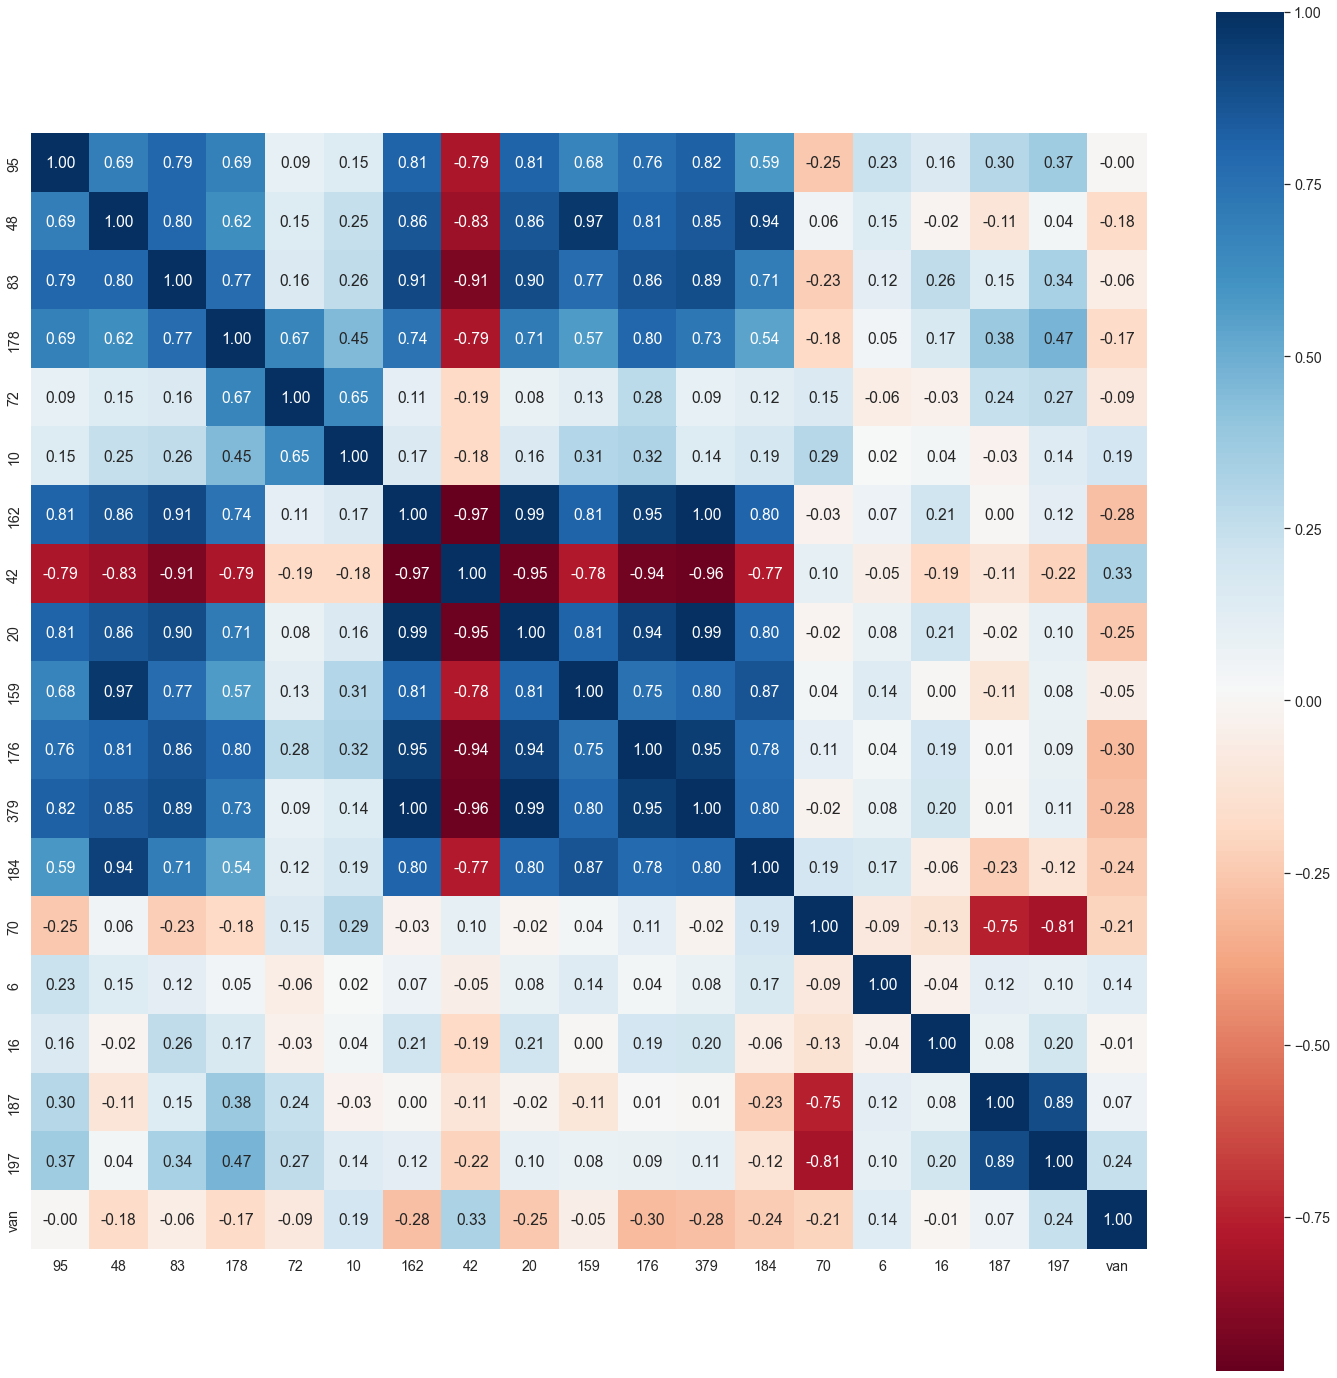

In [988]:
sns.set(font_scale=1.3)
plt.subplots(figsize=(25, 25))
sns.heatmap(raw_dataset.corr(),
            square=True,
            annot=True,
            fmt=".2f",
            cmap="RdBu")

In [989]:
df = raw_dataset.values
data = df[:, :-1].astype(int)
target = df[:, -1]

In [990]:
data

array([[ 91,  41,  84, ...,  14, 189, 199],
       [104,  50, 106, ...,   9, 188, 196],
       [ 93,  41,  82, ...,  10, 199, 207],
       ...,
       [106,  54, 101, ...,   4, 187, 201],
       [ 86,  36,  78, ...,  25, 190, 195],
       [ 85,  36,  66, ...,  18, 186, 190]])

In [991]:
target

array([3, 2, 3, 0, 0, 0, 3, 3, 2, 3, 2, 0, 3, 0, 1, 3, 0, 2, 1, 0, 3, 0,
       0, 2, 3, 2, 2, 0, 2, 3, 2, 1, 1, 1, 3, 0, 3, 2, 0, 1, 3, 3, 2, 2,
       3, 3, 0, 3, 2, 2, 2, 1, 0, 0, 3, 2, 3, 1, 3, 1, 1, 3, 0, 0, 1, 0,
       1, 3, 0, 1, 1, 1, 1, 3, 1, 2, 2, 0, 0, 0, 0, 3, 1, 0, 0, 3, 3, 0,
       1, 2, 1, 2, 3, 0, 1, 2, 0, 1, 0, 0, 3, 3, 3, 0, 2, 1, 1, 0, 0, 3,
       3, 1, 1, 3, 3, 1, 2, 0, 0, 2, 3, 3, 2, 3, 3, 0, 0, 3, 0, 2, 2, 2,
       3, 1, 3, 3, 3, 2, 3, 2, 0, 1, 0, 1, 1, 3, 0, 2, 3, 2, 0, 1, 2, 3,
       0, 1, 3, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 0, 3, 1, 0, 3, 0, 3, 0, 1,
       0, 0, 3, 2, 1, 0, 2, 2, 0, 0, 1, 1, 1, 1, 3, 2, 0, 2, 0, 2, 0, 0,
       0, 3, 2, 1, 1, 3, 3, 1, 0, 0, 1, 1, 3, 0, 0, 1, 1, 2, 1, 0, 3, 1,
       3, 0, 0, 2, 3, 2, 3, 2, 2, 3, 2, 0, 2, 3, 3, 0, 0, 1, 0, 1, 1, 0,
       2, 3, 3, 0, 2, 1, 2, 3, 1, 3, 0, 3, 2, 2, 1, 2, 1, 2, 2, 3, 3, 2,
       0, 0, 2, 3, 3, 0, 2, 3, 3, 0, 0, 0, 1, 2, 0, 1, 0, 0, 2, 3, 2, 0,
       3, 1, 2, 3, 3, 0, 3, 0, 0, 0, 2, 2, 0, 2, 1,

In [992]:
# Нормализуем данные
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(data)
data = scaler.transform(data)
data

array([[-0.32509227, -0.6253912 ,  0.12125834, ...,  0.15729667,
         0.0105602 ,  0.45293588],
       [ 1.25366042,  0.8335352 ,  1.51617942, ..., -0.40258408,
        -0.1516829 ,  0.04963681],
       [-0.08220724, -0.6253912 , -0.00555267, ..., -0.29060793,
         1.63299119,  1.52840006],
       ...,
       [ 1.49654545,  1.48194693,  1.1991519 , ..., -0.96246483,
        -0.313926  ,  0.72180192],
       [-0.93230484, -1.43590586, -0.25917469, ...,  1.38903433,
         0.1728033 , -0.08479621],
       [-1.05374736, -1.43590586, -1.02004073, ...,  0.60520128,
        -0.47616909, -0.75696133]])

In [993]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35, random_state=90)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(549, 18) (549,) (296, 18) (296,)


#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [994]:
### YOUR CODE HERE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import cross_val_score

from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

def train_model(model, param):
    grid_search = GridSearchCV(model, param)
    grid_search.fit(X_train, y_train)
    print(model)
    print("tuned param :(best parameters) ", grid_search.best_params_)
    #print("accuracy :", grid_search.best_score_)
    y_pred = grid_search.predict(X_test)
    print(classification_report(y_test, y_pred)) 
    print("Test score", grid_search.score(X_test, y_test))  

In [995]:
parameters_for_logreg = {"C" : np.logspace(-3, 3, 7), "penalty":["l1", "l2"]}
logreg = LogisticRegression(multi_class='multinomial',
                            solver='saga',
                            tol=1e-3,
                            max_iter=500,
                            random_state=42)

train_model(logreg, parameters_for_logreg)

LogisticRegression(max_iter=500, multi_class='multinomial', random_state=42,
                   solver='saga', tol=0.001)
tuned param :(best parameters)  {'C': 100.0, 'penalty': 'l1'}
              precision    recall  f1-score   support

           0       0.97      0.93      0.95        76
           1       0.66      0.71      0.68        73
           2       0.73      0.68      0.71        79
           3       0.96      0.99      0.97        68

    accuracy                           0.82       296
   macro avg       0.83      0.83      0.83       296
weighted avg       0.83      0.82      0.82       296

Test score 0.8243243243243243


In [996]:
# from scikitplot import metrics

# Check out f1 band accuracy scores and plot a ROC-curve
logreg = LogisticRegression(multi_class='multinomial',
                            solver='saga',
                            tol=1e-3,
                            max_iter=500,
                            random_state=42,
                            C = 100,
                            penalty='l1')
logreg_clf = logreg.fit(X_train, y_train)
logreg_prediction = logreg_clf.predict(X_test)

print(f"f1 score is {f1_score(y_test, logreg_prediction, average='macro')}")
print(f"accuracy score is {accuracy_score(y_test, logreg_prediction)}")

# metrics.plot_roc(y_test, logreg_prediction)

f1 score is 0.8285318765596942
accuracy score is 0.8243243243243243


In [997]:
# You might use this command to install scikit-plot. 
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding 
# virtual environment instead

# ! pip install scikit-plot

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

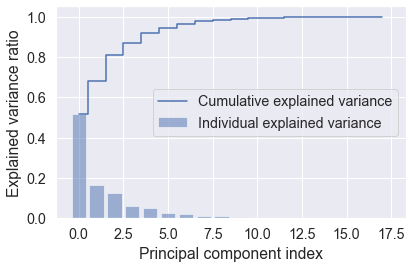

'\nВ соответсвии с графиком, делаем вывод, что оптимаьлно брать первые 5-6 компонент, т. к. далее\nдисперсия уже особо не увеличивается.\n'

In [998]:
### YOUR CODE HERE
from sklearn import decomposition

'''
В этой части кода, мы рассматриваем основные направления и изучаем какая дисперсия данных будет
при проекции на каждую из компонент.
Bar график показывает величину дисперсии при проекции на отдельную компоненту.
Столбчатый график показывает суммарную дисперсию при использовании первых k компонент.
Наша задача -- получить максимальную дисперсию при проекции.
'''

#
# Instantiate PCA
#
pca = decomposition.PCA()
#
# Determine transformed features
#
X_train_pca = pca.fit_transform(X_train)
#
# Determine explained variance using explained_variance_ration_ attribute
#
exp_var_pca = pca.explained_variance_ratio_
#
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
#
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#
# Create the visualization plot
#
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

'''
В соответсвии с графиком, делаем вывод, что оптимаьлно брать первые 5-6 компонент, т. к. далее
дисперсия уже особо не увеличивается.
'''

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [999]:
### YOUR CODE HERE
from sklearn import decomposition

pca = decomposition.PCA(n_components=9)

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.fit_transform(X_test)

np.shape(X_train_pca)

(549, 9)

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [1000]:
### YOUR CODE HERE

logreg = LogisticRegression(multi_class='multinomial',
                            solver='saga',
                            tol=1e-3,
                            max_iter=500,
                            random_state=42)

logreg.fit(X_train_pca, y_train)
pred = logreg.predict(X_test_pca)
accuracy_score(y_test, pred)

0.5675675675675675

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [1001]:
from sklearn.tree import DecisionTreeClassifier

# YOUR CODE HERE
def train_model(model, param):
    grid_search = GridSearchCV(model, param)
    grid_search.fit(X_train_pca, y_train)
    print(model)
    print("tuned param :(best parameters) ", grid_search.best_params_)
    #print("accuracy :", grid_search.best_score_)
    y_pred = grid_search.predict(X_test_pca)
    print(classification_report(y_test, y_pred)) 
    print("Test score", grid_search.score(X_test_pca, y_test))  

In [1002]:
from sklearn.tree import DecisionTreeClassifier

tree_depth = np.arange(1, 15, 1)
cros_val_scores = []
for depth in tree_depth:
    clf = DecisionTreeClassifier(max_depth=depth,
                                 random_state=0)
    scores = cross_val_score(clf, X_train_pca, y_train, cv=10, scoring='accuracy')
    cros_val_scores.append(scores.mean())

print(cros_val_scores)
print(f"The max cross validation score is {np.max(cros_val_scores)} with the optimal depth is {np.argmax(cros_val_scores) + 1}")

clf = DecisionTreeClassifier(max_depth=np.argmax(cros_val_scores) + 1,
                            random_state=0)
clf.fit(X_train_pca, y_train)
prediction = clf.predict(X_test_pca)

desision_tree_accuracy_score = accuracy_score(y_test, prediction)
desision_tree_f1_score = f1_score(y_test, prediction, average='micro')
print(f"accuracy score (in %) is {desision_tree_accuracy_score*100}")
print(f"f1 score (in %) is {desision_tree_f1_score*100}")

[0.3734006734006734, 0.4772390572390573, 0.4845117845117845, 0.5536700336700335, 0.59010101010101, 0.600909090909091, 0.601043771043771, 0.602996632996633, 0.6247138047138047, 0.6064646464646464, 0.6264983164983164, 0.6192592592592592, 0.6174410774410773, 0.6083501683501683]
The max cross validation score is 0.6264983164983164 with the optimal depth is 11
accuracy score (in %) is 51.35135135135135
f1 score (in %) is 51.35135135135135


#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

c:\Users\MI NOTEBOOK\AppData\Local\Programs\Python\Python37-32\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
c:\Users\MI NOTEBOOK\AppData\Local\Programs\Python\Python37-32\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
c:\Users\MI NOTEBOOK\AppData\Local\Programs\Python\Python37-32\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
c:\Users\MI NOTEBOOK\AppData\Local\Programs\Python\Python37-32\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
c:\Users\MI NOTEBOOK\AppData\Local\Programs\Python\Python37-32\lib\site-packages\sklearn\linear_model\_sag.py:354: C

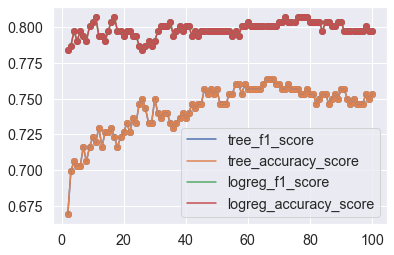

In [1003]:
# # YOUR CODE HERE
from sklearn.ensemble import BaggingClassifier

N_estimators = np.arange(2, 100+1)

#* firstly do bagging with DesisionTreeClassifier
tree_f1_score = []
tree_accuracy_score = []
for n in N_estimators:
    tree = DecisionTreeClassifier(max_depth=11)
    clf = BaggingClassifier(tree, n_estimators=n, random_state=0, max_samples=X_train.shape[0])
    clf.fit(X_train, y_train)
    prediction = clf.predict(X_test)
    ensemble_tree_accuracy_score = accuracy_score(y_test, prediction)
    ensemble_tree_f1_score = f1_score(y_test, prediction, average='micro')

    tree_f1_score.append(ensemble_tree_f1_score)
    tree_accuracy_score.append(ensemble_tree_accuracy_score)

#* secondly do bagging with LogisticRegression
logreg_f1_score = []
logreg_accuracy_score = []
for n in N_estimators:
    logreg = LogisticRegression(multi_class='multinomial',
                            solver='saga',
                            tol=1e-3,
                            max_iter=500,
                            random_state=42)
    
    clf = BaggingClassifier(logreg, n_estimators=n, random_state=0, max_samples=X_train.shape[0])
    clf.fit(X_train, y_train)
    prediction = clf.predict(X_test)
    ensemble_tree_accuracy_score = accuracy_score(y_test, prediction)
    ensemble_tree_f1_score = f1_score(y_test, prediction, average='micro')

    logreg_f1_score.append(ensemble_tree_f1_score)
    logreg_accuracy_score.append(ensemble_tree_accuracy_score)

plt.scatter(N_estimators, tree_f1_score)
plt.plot(N_estimators, tree_f1_score, label='tree_f1_score')

plt.scatter(N_estimators, tree_accuracy_score)
plt.plot(N_estimators, tree_accuracy_score, label='tree_accuracy_score')

plt.scatter(N_estimators, logreg_f1_score)
plt.plot(N_estimators, logreg_f1_score, label='logreg_f1_score')

plt.scatter(N_estimators, logreg_accuracy_score)
plt.plot(N_estimators, logreg_accuracy_score, label='logreg_accuracy_score')

plt.legend()

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

Text(0, 0.5, 'score')

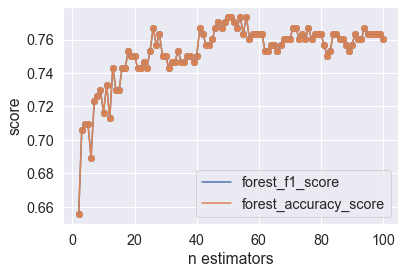

In [1004]:
from sklearn.ensemble import RandomForestClassifier

# YOUR CODE HERE
N_estimators = np.arange(2, 100+1)

#* firstly do bagging with DesisionTreeClassifier
forest_f1_score = []
forest_accuracy_score = []
for n in N_estimators:
    clf = RandomForestClassifier(max_depth=15, n_estimators=n, random_state=0)
    clf.fit(X_train, y_train)
    prediction = clf.predict(X_test)
    ensemble_tree_accuracy_score = accuracy_score(y_test, prediction)
    ensemble_tree_f1_score = f1_score(y_test, prediction, average='micro')

    forest_f1_score.append(ensemble_tree_f1_score)
    forest_accuracy_score.append(ensemble_tree_accuracy_score)

plt.scatter(N_estimators, forest_f1_score)
plt.plot(N_estimators, forest_f1_score, label='forest_f1_score')

plt.scatter(N_estimators, forest_accuracy_score)
plt.plot(N_estimators, forest_accuracy_score, label='forest_accuracy_score')

plt.legend()
plt.xlabel('n estimators')
plt.ylabel('score')

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

c:\Users\MI NOTEBOOK\AppData\Local\Programs\Python\Python37-32\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
c:\Users\MI NOTEBOOK\AppData\Local\Programs\Python\Python37-32\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
c:\Users\MI NOTEBOOK\AppData\Local\Programs\Python\Python37-32\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
c:\Users\MI NOTEBOOK\AppData\Local\Programs\Python\Python37-32\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


Text(0, 0.5, 'model score')

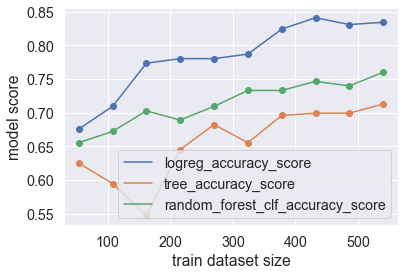

In [1005]:
# YOUR CODE HERE
train_data_list = [X_train[:54*i] for i in range(1, 10+1)]
train_target_list = [y_train[:54*i] for i in range(1, 10+1)]

logreg = logreg = LogisticRegression(multi_class='multinomial',
                            solver='saga',
                            tol=1e-3,
                            max_iter=500,
                            random_state=42,
                            C = 100,
                            penalty='l1')

tree_clf = clf = DecisionTreeClassifier(max_depth=11, random_state=0)

random_forest_clf = RandomForestClassifier(max_depth=15, n_estimators=50, random_state=0)

logreg_accuracy_score = []
tree_clf_accuracy_score = []
random_forest_clf_accuracy_score = []
for feature_train, target_train in zip(train_data_list, train_target_list):
    # обучаем модели
    logreg.fit(feature_train, target_train)
    tree_clf.fit(feature_train, target_train)
    random_forest_clf.fit(feature_train, target_train)

    # делаем предсказание
    logreg_prediction = logreg.predict(X_test)
    tree_clf_prediction = tree_clf.predict(X_test)
    random_forest_clf_prediction = random_forest_clf.predict(X_test)

    # оцениваем модели
    logreg_accuracy_score.append(accuracy_score(y_test, logreg_prediction))
    tree_clf_accuracy_score.append(accuracy_score(y_test, tree_clf_prediction))
    random_forest_clf_accuracy_score.append(accuracy_score(y_test, random_forest_clf_prediction))

train_el_amnt = range(54, 540+1, 54)

plt.scatter(train_el_amnt, logreg_accuracy_score)
plt.plot(train_el_amnt, logreg_accuracy_score, label='logreg_accuracy_score')

plt.scatter(train_el_amnt, tree_clf_accuracy_score)
plt.plot(train_el_amnt, tree_clf_accuracy_score, label='tree_accuracy_score')

plt.scatter(train_el_amnt, random_forest_clf_accuracy_score)
plt.plot(train_el_amnt, random_forest_clf_accuracy_score, label='random_forest_clf_accuracy_score')

plt.legend()
plt.xlabel('train dataset size')
plt.ylabel('model score')

#### 2.9. Boosting
Your goal is to build a boosting ensemble using xgboost, CatBoost or lightgbm package.
Please, do not use the sklearn API for these models.

Find optimal number of decision trees in the boosting ensembe using grid search or other methods.
Please, explain your answer.

In [1009]:
# YOUR CODE HERE
import xgboost as xgb

boost_model = xgb.XGBClassifier(objective='multi:softprob',
                                learning_rate=0.1,
                                max_depth=1,
                                n_estimators=330) # multi:softprob is a xgb objective (loss) multiclass function
# Fit the model to the training data
boost_model.fit(X_train, y_train)

boost_prediction = boost_model.predict(X_test)
print(f"accuracy score = {accuracy_score(y_test, boost_prediction)}")

ModuleNotFoundError: No module named 'xgboost'